# Building a Linear Regression Model to Predict Diabetes Progression

# Import software libraries and load the dataset #

In [1]:
import sys                                             # Read system parameters.
import numpy as np                                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                                    # Manipulate and analyze data.
import matplotlib as mpl                               # Create 2D charts.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns                                  # Perform data visualization.
import sklearn                                         # Perform data mining and analysis.
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- Seaborn {}'.format(sns.__version__))
print('- scikit-learn {}\n'.format(sklearn.__version__))

# Load the dataset.
diabetes = datasets.load_diabetes()
print('Loaded {} records.'.format(len(diabetes.data)))

Libraries used in this project:
- Python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
- NumPy 1.19.2
- pandas 1.1.3
- Matplotlib 3.3.2
- Seaborn 0.11.0
- scikit-learn 0.23.2

Loaded 442 records.


# Get acquainted with the dataset

In [2]:
# Convert array to pandas DataFrame.

# View data types and see if there are missing entries.

# View first 10 records.

In [3]:
print(diabetes)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [4]:
type(diabetes)

sklearn.utils.Bunch

In [5]:
df = pd.DataFrame(pd.DataFrame(diabetes.data, columns=diabetes.feature_names))

In [6]:
df["target"] = pd.Series(diabetes.target)

In [7]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [8]:
#df.to_csv("diabetes.csv",index=False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [10]:
df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


# Examine the distribution of various features

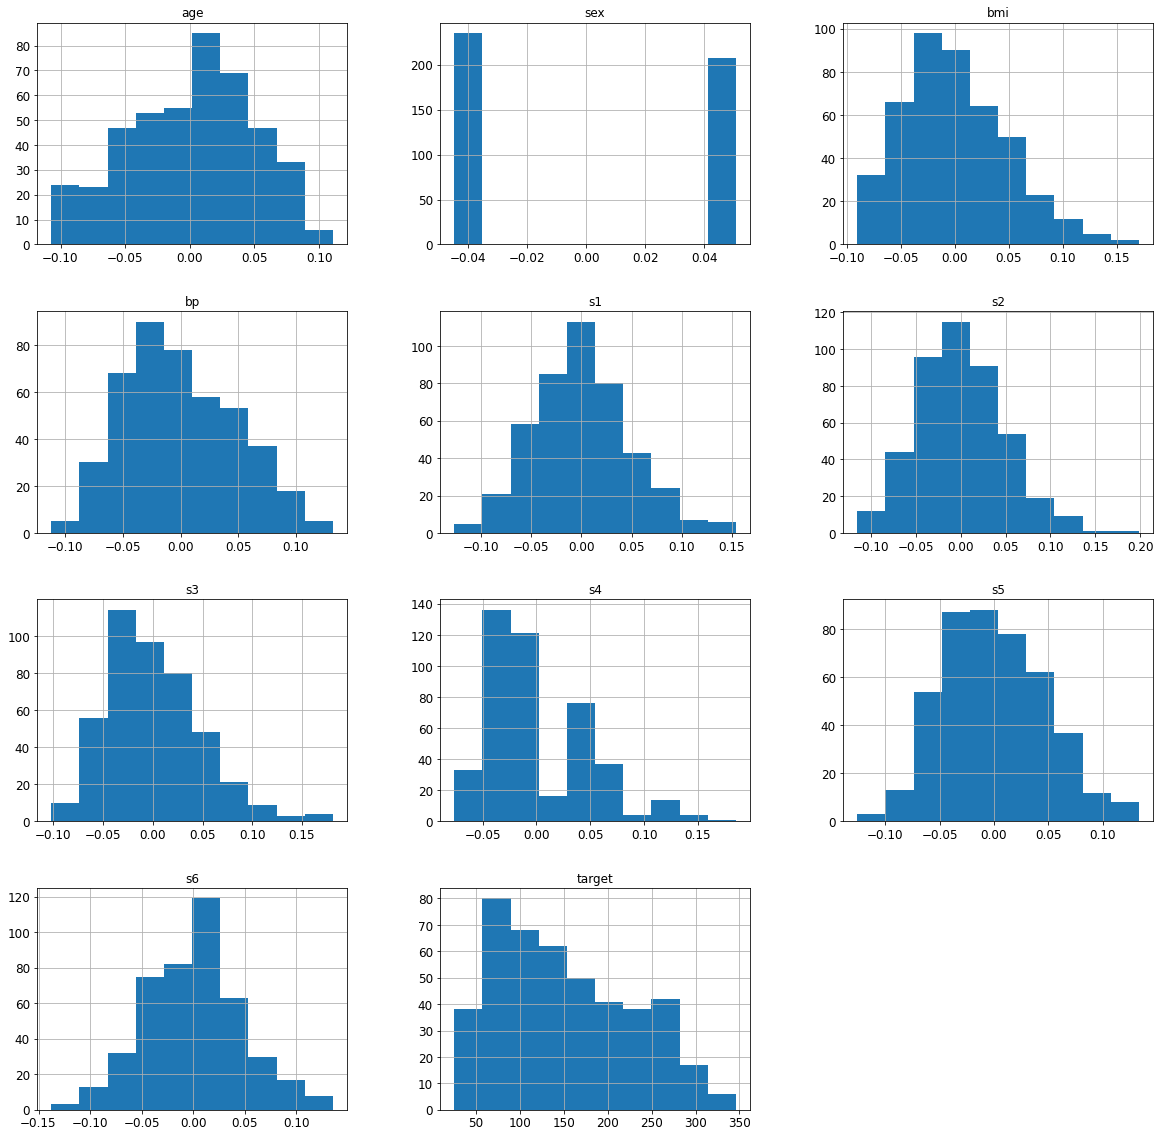

In [11]:
# Use Matplotlib to plot distribution histograms for all features.

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

df.hist(figsize=(20,20))
plt.show()

# Examine a general summary of statistics

In [12]:
# View summary statistics (mean, standard deviation, min, max, etc.) for each feature.
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


# Look for columns that correlate with `target` (disease progression)#

In [13]:
# View the correlation values for each feature compared to the label.

df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [14]:
df.corr()["target"].sort_values()

s3       -0.394789
sex       0.043062
s2        0.174054
age       0.187889
s1        0.212022
s6        0.382483
s4        0.430453
bp        0.441484
s5        0.565883
bmi       0.586450
target    1.000000
Name: target, dtype: float64

# Split the label from the dataset

In [15]:
df = pd.read_csv("diabetes.csv")

In [16]:
# Split the training and test datasets and their labels.

# Compare the number of rows and columns in the original data to the training and test sets.

df.shape

(442, 11)

In [17]:
X = df.iloc[:,0:10]
y = df.iloc[:,10]

In [18]:
X.values, y.values

(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
   

# Drop columns that won't be used for training

In [19]:
# Drop the three features that have the least correlation with the label.
X = X.drop(['s3','sex','s2'],axis=1)

In [20]:
X

,age,bmi,bp,s1,s4,s5,s6
0,0.038076,0.061696,0.021872,-0.044223,-0.002592,0.019908,-0.017646
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.039493,-0.068330,-0.092204
2,0.085299,0.044451,-0.005671,-0.045599,-0.002592,0.002864,-0.025930
3,-0.089063,-0.011595,-0.036656,0.012191,0.034309,0.022692,-0.009362
4,0.005383,-0.036385,0.021872,0.003935,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...
437,0.041708,0.019662,0.059744,-0.005697,-0.002592,0.031193,0.007207
438,-0.005515,-0.015906,-0.067642,0.049341,0.034309,-0.018118,0.044485
439,0.041708,-0.015906,0.017282,-0.037344,-0.011080,-0.046879,0.015491
440,-0.045472,0.039062,0.001215,0.016318,0.026560,0.044528,-0.025930


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 7), (89, 7), (353,), (89,))

# Create a linear regression model

In [23]:
# Construct a basic linear regression class object.

# Fit the training data to the regression object.

lr = LinearRegression()

In [24]:
lr.fit(X_train,y_train)

LinearRegression()

# Compare the first ten predictions to actual values

In [25]:
# Make predictions on the test set.

# View examples of the predictions compared to actual disease progression.

In [26]:
lr_pred = lr.predict(X_test)

In [27]:
lr_pred[:10]

array([246.52152298, 237.49962928, 168.15189429, 108.45065349,
       181.207177  , 251.03066105, 105.76063771, 194.56077313,
       144.43387399, 229.1423256 ])

In [28]:
y_test[:10]

362    321.0
249    215.0
271    127.0
435     64.0
400    175.0
403    275.0
12     179.0
399    232.0
198    142.0
205     99.0
Name: target, dtype: float64

In [29]:
X_test

,age,bmi,bp,s1,s4,s5,s6
362,0.019913,0.104809,0.070073,-0.035968,-0.002592,0.003712,0.040343
249,-0.012780,0.060618,0.052858,0.047965,0.034309,0.070211,0.007207
271,0.038076,0.008883,0.042530,-0.042848,-0.002592,-0.018118,0.007207
435,-0.012780,-0.023451,-0.040099,-0.016704,-0.002592,-0.038459,-0.038357
400,-0.023677,0.045529,0.090730,-0.018080,-0.039493,-0.034524,-0.009362
...,...,...,...,...,...,...,...
381,-0.070900,-0.089197,-0.074528,-0.042848,-0.002592,-0.012908,-0.054925
213,0.001751,-0.070875,-0.022885,-0.001569,-0.039493,-0.022512,0.007207
134,-0.074533,0.043373,-0.033214,0.012191,-0.039493,-0.027129,-0.046641
49,-0.041840,0.014272,-0.005671,-0.012577,0.071210,0.035462,-0.013504


In [30]:
table = X_test.copy()

In [31]:
table.shape

(89, 7)

In [32]:
table["True Value"] = y_test.copy()

In [33]:
table

,age,bmi,bp,s1,s4,s5,s6,True Value
362,0.019913,0.104809,0.070073,-0.035968,-0.002592,0.003712,0.040343,321.0
249,-0.012780,0.060618,0.052858,0.047965,0.034309,0.070211,0.007207,215.0
271,0.038076,0.008883,0.042530,-0.042848,-0.002592,-0.018118,0.007207,127.0
435,-0.012780,-0.023451,-0.040099,-0.016704,-0.002592,-0.038459,-0.038357,64.0
400,-0.023677,0.045529,0.090730,-0.018080,-0.039493,-0.034524,-0.009362,175.0
...,...,...,...,...,...,...,...,...
381,-0.070900,-0.089197,-0.074528,-0.042848,-0.002592,-0.012908,-0.054925,104.0
213,0.001751,-0.070875,-0.022885,-0.001569,-0.039493,-0.022512,0.007207,49.0
134,-0.074533,0.043373,-0.033214,0.012191,-0.039493,-0.027129,-0.046641,103.0
49,-0.041840,0.014272,-0.005671,-0.012577,0.071210,0.035462,-0.013504,142.0


In [34]:
table["Predicted"] = np.round(lr_pred,2)

In [35]:
table

,age,bmi,bp,s1,s4,s5,s6,True Value,Predicted
362,0.019913,0.104809,0.070073,-0.035968,-0.002592,0.003712,0.040343,321.0,246.52
249,-0.012780,0.060618,0.052858,0.047965,0.034309,0.070211,0.007207,215.0,237.50
271,0.038076,0.008883,0.042530,-0.042848,-0.002592,-0.018118,0.007207,127.0,168.15
435,-0.012780,-0.023451,-0.040099,-0.016704,-0.002592,-0.038459,-0.038357,64.0,108.45
400,-0.023677,0.045529,0.090730,-0.018080,-0.039493,-0.034524,-0.009362,175.0,181.21
...,...,...,...,...,...,...,...,...,...
381,-0.070900,-0.089197,-0.074528,-0.042848,-0.002592,-0.012908,-0.054925,104.0,86.30
213,0.001751,-0.070875,-0.022885,-0.001569,-0.039493,-0.022512,0.007207,49.0,82.69
134,-0.074533,0.043373,-0.033214,0.012191,-0.039493,-0.027129,-0.046641,103.0,145.36
49,-0.041840,0.014272,-0.005671,-0.012577,0.071210,0.035462,-0.013504,142.0,199.57


# Calculate the error between predicted and actual values

In [36]:
# Print the mean squared error (MSE) for the model's predictions on the test set.
mean_squared_error(y_test,lr_pred)

3531.2250809792145

# Plot lines of best fit for four features

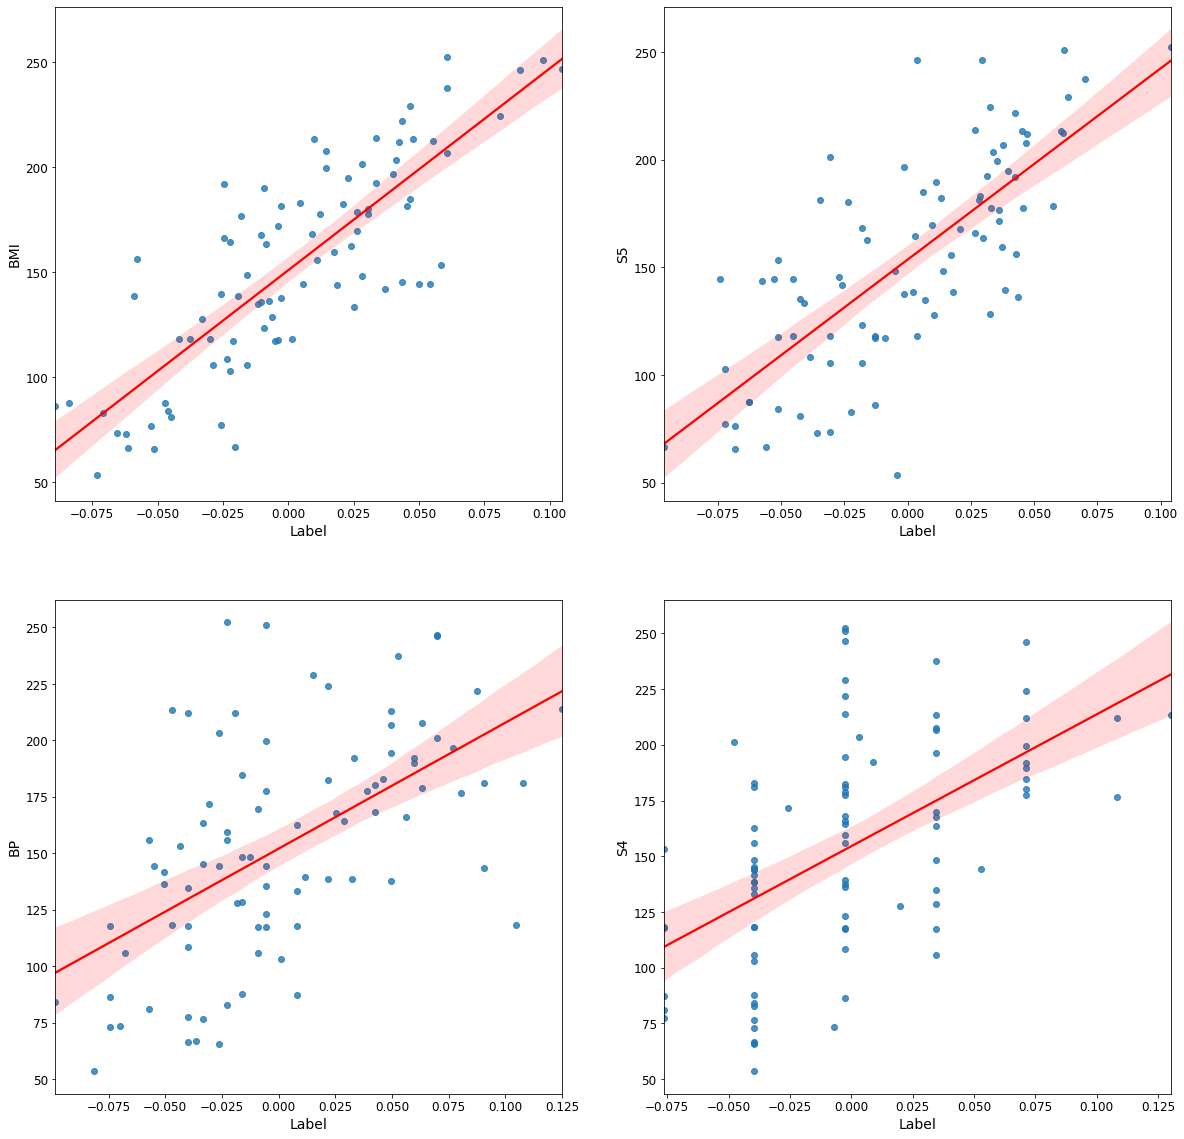

In [37]:
# Use Seaborn to create subplots for the four features that have the strongest correlation with the label.
# Also plot a line of best fit for each feature.

line_color = {'color': 'red'}
fig , ax = plt.subplots(2,2, figsize=(20,20))

#BMI

ax1 = sns.regplot(x=X_test.bmi, y=lr_pred, line_kws=line_color, ax=ax[0,0])
ax1.set_xlabel("Label")
ax1.set_ylabel("BMI")


#s5

ax2 = sns.regplot(x=X_test.s5, y=lr_pred, line_kws=line_color, ax=ax[0,1])
ax2.set_xlabel("Label")
ax2.set_ylabel("S5")


#bp

ax3 = sns.regplot(x=X_test.bp, y=lr_pred, line_kws=line_color, ax=ax[1,0])
ax3.set_xlabel("Label")
ax3.set_ylabel("BP")

#s4

ax4 = sns.regplot(x=X_test.s4, y=lr_pred, line_kws=line_color, ax=ax[1,1])
ax4.set_xlabel("Label")
ax4.set_ylabel("S4")

plt.show()